# Práctica 1 - Self-Organising Maps - COLORES

#### Importar librerías de código

In [7]:
''' Llamada a las librerias necesarias e imports'''

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from sklearn.preprocessing import normalize
import pandas as pd

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [8]:
# Código para obtener el Dataset que se va a usar en el entrenamiento

''' 
    Se definen los parametros necesarios para crear el Dataset de entrenamiento 

        . valorMinimo = valor minimo que puede tomar un dato RGB
        . valorMaximo = valor maximo que puede tomar un dato RGB
        . numeroDatos = cantidad de colores que contiene el Dataset
        . valorDato = cantidad de valores que tiene cada color del Dataset (RGB tiene 3 valores)

'''
valor_min = 0 
valor_max = 255 
num_colores = 100
valores_rgb = 3 

# Se crea la matriz de datos correspondiente al Dataset
datos = np.random.randint(valor_min, valor_max+1, (num_colores, valores_rgb))

## SOM Setup
#### Variables definidas por el alumno

In [9]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no


lado_mapa = 35 # Lado del mapa de kohonen
periodo = 8000 # Numero de etapas del entrenamiento
learning_rate = 0.4
normalizar_datos = 1;

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [10]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = lado_mapa
num_datos = len(datos[0])

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa/2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
if normalizar_datos:
    datos = datos/valor_max
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
matriz_pesos = np.random.random((num_entradas, num_entradas, num_datos))

#### Funciones para entrenar/clasificar

In [11]:
# Función para encontrar la BMU

"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""

def calcular_bmu(patron_entrada, m_pesos, m):
    
    # Creacion de una matriz de tamaño lado_mapa x lado_mapa que almacena las distancias euclideas de cada neurona con el patron
    matriz_dist = np.zeros([len(m_pesos), len(m_pesos)])
    
    # Se recorre la matriz de pesos, calculando la distancia euclidea del patron dado con el vector de pesos de cada neurona
    # El resultado se almacena en 'matriz_dist' en las mismas coordenadas de cada neurona
    for i in range(0, len(m_pesos)):
        for j in range(0, len(m_pesos)):
           
            matriz_dist[i][j] = np.sqrt(np.power((patron_entrada[0] - m_pesos[i][j][0]), 2) + 
                                             np.power((patron_entrada[1] - m_pesos[i][j][1]), 2) + 
                                             np.power((patron_entrada[2] - m_pesos[i][j][2]), 2))
    
    # Se obtienen las coordenadas del valor mas pequeño entre las distancias euclideas
    fil_bmu, col_bmu = np.where(matriz_dist == np.amin(matriz_dist))

    # Se guardanlas coordenadas de la BMU en un vector de dos posiciones para devolverlo
    bmu_idx = np.array([int(fil_bmu), int(col_bmu)])

    # Se guarda el vector de pesos de la BMU para devolverlo
    bmu = m_pesos[bmu_idx[0]][bmu_idx[1]]
    
    return bmu_idx, bmu

In [12]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)

"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""

def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    return lr_inicial*(1 - (i/n_iteraciones))

In [13]:
# Función para calcular el descenso del vecindario (v)

"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""

def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    return 1 + vecindario_inicial*(1 - (i/n_iteraciones))

In [14]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU

"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""

def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

In [15]:
# Función para pintar una matriz de valores como colores RGB

# Se ha modificado la función para mostrar la variación del nº de iteraciones
def pintar_mapa(matriz_valores, iteraciones):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % iteraciones)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()

## SOM Entrenamiento

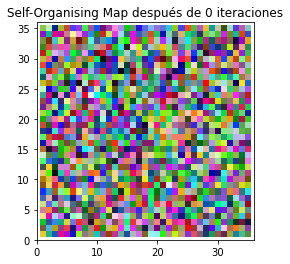

Matriz de pesos entrenada: 
[[[0.06094303 0.90389374 0.42339351]
  [0.05954848 0.89792083 0.43611026]
  [0.06830822 0.88796805 0.45480406]
  ...
  [0.0395968  0.41755902 0.90778663]
  [0.03907235 0.4027552  0.9144734 ]
  [0.04009447 0.37567745 0.92588276]]

 [[0.06891127 0.9187372  0.38880996]
  [0.06604043 0.90977137 0.40982278]
  [0.06668995 0.89778662 0.43535231]
  ...
  [0.04191293 0.41038394 0.91094914]
  [0.04025776 0.39076376 0.91961024]
  [0.04398121 0.36906159 0.92836372]]

 [[0.08417605 0.92692094 0.36569382]
  [0.07817412 0.92006941 0.3838764 ]
  [0.0729139  0.9070962  0.41456006]
  ...
  [0.05487119 0.40035482 0.9147159 ]
  [0.0463515  0.38019895 0.92374255]
  [0.04977994 0.35916701 0.93194475]]

 ...

 [[0.74665047 0.66117045 0.07325782]
  [0.74710947 0.66055618 0.07411463]
  [0.75302687 0.65359225 0.07594535]
  ...
  [0.86979387 0.04952811 0.4909232 ]
  [0.86082629 0.04446816 0.50695234]
  [0.855601   0.04765387 0.51543772]]

 [[0.74700573 0.66093709 0.07172591]
  [0.7490

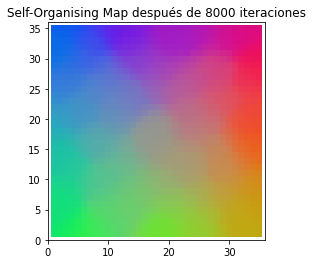

In [16]:
# Entrena la red con el dataset de entrenamiento

sumatorio = 0;

# Se pinta la matriz de pesos iniciales
pintar_mapa(matriz_pesos, 0)

#Bucle de entrenamiento
for p in range(1, periodo+1):
    
    # Mostramos en que iteración estamos con saltos de 100 en 100
    if((p)%100 == 0):
        print(f"Iteracion {p}", end='\r')

    # Se escoge aleatoriamente un patron (color) del conjunto de datos de entrada
    patron = np.random.randint(len(datos))
    
    # Se calcula la bmu asociada al patron de entrada
    bmu_idx, bmu = calcular_bmu(datos[patron], matriz_pesos, len(datos[patron]))
    
    # Se calcula la variacion de eta
    eta = variacion_learning_rate(learning_rate, p, periodo) 
   
    # Se calcula el nuevo vecindario
    v = variacion_vecindario(vecindario, p, periodo) 

    # Bucle que recorre la matriz de pesos calculando la distancia euclidea 2-D de cada neurona respecto de la BMU
    for i in range(len(matriz_pesos)):
        for j in range(len(matriz_pesos)):
            #verificamos si la posición actual en la matriz es igual a la posición (coordenadas) de la BMU; de no ser así calcular la distancia euclidea y actualizamos los pesos
            if i == bmu_idx[0] and j == bmu_idx[1]:
                continue
            else:
            
            # Fórmula para calcular la distancia euclidea 2-D de cada neurona respecto de la BMU
                euc_2D = (((bmu_idx[0] - i)**2) + ((bmu_idx[1] - j)**2))**0.5

            # Si la distancia euclidea es menor o igual que el vecindario actual se calcula la amortiguacion de la neurona
            # y se actualiza el vector de pesos de la misma
                if(euc_2D <= v):
                    amortiguacion = decay(euc_2D, v)
                    # Fórmula para actualizar el vector de pesos de la neurona
                    for k in range(len(matriz_pesos[i,j])): # Actualizamos los pesos
                        matriz_pesos[i,j,k] = matriz_pesos[i,j,k]+eta*amortiguacion*(datos[patron][k]-matriz_pesos[i,j,k])
                    for w in range(len(matriz_pesos[i,j])): # calcula la norma euclidiana del vector de pesos actualizado.
                            sumatorio += matriz_pesos[i,j,w]**2
                    matriz_pesos[i,j] = matriz_pesos[i,j]/(sumatorio**0.5)
                    sumatorio = 0
    
# Una vez se ha terminado el bucle de entrenamiento, se imprime la matriz de pesos entrenada
print(f"Matriz de pesos entrenada: \n{matriz_pesos}\n")
# Tambien se pinta le mapa de colores RGB resultante 
pintar_mapa(matriz_pesos, periodo)

## SOM Clasificación

#### Funcion para calcular el error de cuantificacion

In [17]:
"""
   Calcula el error de cuantificación
   Entradas: vector con las distancias euclideas entre cada patron de datos y su BMU
   Salidas:  error de cuantificacion calculado
"""

def calcularErrorCuantificacion(vectorCuantificacion):
    return (1/len(vectorCuantificacion))*np.sum(vectorCuantificacion)

#### Funciones para calcular el error topologico

In [18]:

"""
   Calcula las coordenadas de la segunda BMU para el patron de entrada dado y
   comprueba si la BMU y la segunda BMU son adyacentes
   Entradas: (coordenadas (x,y) de la BMU, patron de datos, matriz de pesos)
   Salidas:  (0 si la primera y la segunda BMU son adyacentes, 1 si la primera y la segunda BMU no son adyacentes)
"""

def calcularSegundaBmu(bmu_idx, patron_entrada, m_pesos):
    
    # Creacion de una matriz de tamaño lado_mapa x lado_mapa que almacena las distancias euclideas de cada neurona con el patron
    matrizDistancias = np.zeros([len(m_pesos), len(m_pesos)])
    
    # Se recorre la matriz de pesos, calculando la distancia euclidea del patron dado con el vector de pesos de cada neurona
    # El resultado se almacena en  la matriz 'matrizDistancias' en las mismas coordenadas de cada neurona
    for i in range(0, len(m_pesos)):
        for j in range(0, len(m_pesos)):
            matrizDistancias[i][j] = np.sqrt(np.power((patron_entrada[0] - m_pesos[i][j][0]), 2) + np.power((patron_entrada[1] - m_pesos[i][j][1]), 2) + np.power((patron_entrada[2] - m_pesos[i][j][2]), 2))
    
    # Se obtienen las coordenadas del valor más pequeño entre las distancias euclideas
    fil_bmu, col_bmu = np.argwhere(matrizDistancias == np.amin(matrizDistancias))[0]
    
    # Se suma un valor grande a la distancia euclidea mas pequeña  para que deje de ser la BMU
    # De esta forma al buscar de nuevo la distancia euclidea mas pequeña, se obtienen las coordenadas correspondientes a
    # la segunda BMU
    matrizDistancias[int(fil_bmu)][int(col_bmu)] += 100
    
    # Se obtienen las coordenadas del valor mas pequeño entre las distancias euclideas (ahora correspondiente a la segunda BMU)
    fil_bmu, col_bmu = np.argwhere(matrizDistancias == np.amin(matrizDistancias))[0]
    
    # Creacion de la variable ret. Esta variable indica si las dos BMU son adyacentes o no
    # Si no son adyacentes, devuelve un 1 y si lo son devuelve un 0
    adyacentes = False

    # Se recorren las celdas adyacentes a la BMU para comprobar si las coordenadas de alguna de esas celdas coinciden con
    # las coordenadas de la segunda BMU
    for i in range(bmu_idx[0]-1, bmu_idx[0]+2):
        for j in range(bmu_idx[1]-1, bmu_idx[1]+2):
            # Si las coordenadas coinciden, la variable adyacentes cambia su valor a True
            if(i == int(fil_bmu) and j == int(col_bmu)):
                adyacentes = True
    
    # Se devuelve 0 o 1 dependiendo de si las BMU son adyacentes o no
    if(adyacentes):
        return 0
    else:
        return 1
    
    
"""
   Calcula el error topologico del mapa
   Entradas: vector de 0 y 1 obtenido comprobando si la BMU y la segunda BMU son adyacentes o no
   Salidas:  error topologico calculado
"""

def calcularErrorTopologico(vectorTopologico):
    return (1/len(vectorTopologico))*np.sum(vectorTopologico)

#### Funcion para clasificar conjuntos de datos

In [19]:
'''
   Clasifica los datos de un Dataset utilizando la matriz de pesos ya entrenada
   Entradas: Dataset a clasificar
   Salidas:  ninguna
'''

def clasificarDatos(conjuntoDatos):

    # Creacion de las tres matrices pedidas en la practica
    mapa_clasificacion = np.zeros((lado_mapa, lado_mapa, len(conjuntoDatos[0])))
    mapa_activaciones = np.zeros((lado_mapa, lado_mapa))
    mapa_distancias = np.zeros((lado_mapa, lado_mapa))
    
    # Creacion de dos vectores, que contendran los datos necesarios para calcular el error topologico y el error de cuantificacion
    vectorTopologico = np.zeros(len(conjuntoDatos))
    vectorCuantificacion = np.zeros(len(conjuntoDatos))

    # Bucle que recorre el Dataset
    for i in range(0, len(conjuntoDatos)):
        # Calculo de la BMU para el patron dado
        bmu_idx, bmu = calcular_bmu(conjuntoDatos[i], matriz_pesos, len(conjuntoDatos[i]))
        print(f"Coordenadas de la BMU para el patron {i+1}: [{bmu_idx[0]}, {bmu_idx[1]}]\n")

        # Calculo de los mapas pedidos en la practica para cada patron del Dataset
        # Se guarda el patrón de datos que se acaba de clasificar en las coordenadas de su BMU
        mapa_clasificacion[bmu_idx[0]][bmu_idx[1]] = conjuntoDatos[i]
        
        # Se incrementa en 1 el valor de las coordenadas de la BMU
        mapa_activaciones[bmu_idx[0]][bmu_idx[1]] += 1
        
        # Se guarda la distancia euclidea entre la BMU y el patron clasificado en las coordenadas de la BMU
        mapa_distancias[bmu_idx[0]][bmu_idx[1]] = np.sqrt(np.power(bmu[0] - conjuntoDatos[i][0], 2) + 
                                                          np.power(bmu[1] - conjuntoDatos[i][0], 2) + 
                                                          np.power(bmu[2] - conjuntoDatos[i][0], 2))
        
        # Vector compuesto por 0 y 1, dependiendo de si las BMU son adyacentes o no
        # Se utilizara mas adelante para calcular el error topológico
        vectorTopologico[i] = calcularSegundaBmu(bmu_idx, conjuntoDatos[i], matriz_pesos)

        # Vector que almacena la distancia euclidea entre el patron dado y su BMU
        # Se utilizara mas adelante para calcular el error de cuantificacion
        vectorCuantificacion[i] = np.sqrt(np.power((conjuntoDatos[i][0] - bmu[0]), 2) + 
                                          np.power((conjuntoDatos[i][1] - bmu[1]), 2) + 
                                          np.power((conjuntoDatos[i][2] - bmu[2]), 2))

    pintar_mapa(mapa_clasificacion, 0)
    pintar_mapa(matriz_pesos, 0)

    # Se muestran los mapas de clasificación, de activaciones y de distancias
    print('\033[1m' + "Mapa clasificacion:" + '\033[0m' + f"\n {mapa_clasificacion} \n\n")
    print('\033[1m' + "Mapa activaciones:" + '\033[0m' + f"\n {mapa_activaciones} \n\n")
    print('\033[1m' + "Mapa distancias:" + '\033[0m' + f"\n {mapa_distancias} \n\n")
    
    # Se calcula el numero de clases, que equivale a el numero de neuronas activadas
    # Para ello recorro la matriz de activaciones y si el valor de las coordenadas x, y es diferente de 0, se suma 1 a la
    # cantidad de clases
    num_clases = 0
    for i in range(0, len(mapa_activaciones)):
        for j in range(0, len(mapa_activaciones)):
            if(mapa_activaciones[i][j] > 0):
                num_clases += 1
                
    print('\033[1m' + f"Numero de clases: {num_clases}" + '\033[0m')
    print('\033[1m' + f"Error topologico: {calcularErrorTopologico(vectorTopologico)}" + '\033[0m')
    print('\033[1m' + f"Error de cuantificacion: {calcularErrorCuantificacion(vectorCuantificacion)}" + '\033[0m')
    
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    xpos = [range(mapa_activaciones.shape[0])]
    ypos = [range(mapa_activaciones.shape[1])]
    xpos, ypos = np.meshgrid(xpos, ypos)
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    dx = 0.5 * np.ones_like(zpos)
    dy = dx.copy()
    dz = mapa_activaciones.flatten()
    ax.set_title('Histograma 3D de la matriz de activaciones')

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')


Coordenadas de la BMU para el patron 1: [24, 18]

Coordenadas de la BMU para el patron 2: [14, 4]

Coordenadas de la BMU para el patron 3: [25, 14]

Coordenadas de la BMU para el patron 4: [17, 33]

Coordenadas de la BMU para el patron 5: [23, 26]

Coordenadas de la BMU para el patron 6: [30, 7]

Coordenadas de la BMU para el patron 7: [30, 25]

Coordenadas de la BMU para el patron 8: [29, 12]

Coordenadas de la BMU para el patron 9: [28, 4]

Coordenadas de la BMU para el patron 10: [31, 17]

Coordenadas de la BMU para el patron 11: [20, 32]

Coordenadas de la BMU para el patron 12: [6, 23]

Coordenadas de la BMU para el patron 13: [34, 16]

Coordenadas de la BMU para el patron 14: [29, 32]

Coordenadas de la BMU para el patron 15: [0, 21]

Coordenadas de la BMU para el patron 16: [0, 20]

Coordenadas de la BMU para el patron 17: [16, 29]

Coordenadas de la BMU para el patron 18: [33, 22]

Coordenadas de la BMU para el patron 19: [24, 20]

Coordenadas de la BMU para el patron 20: [0, 1

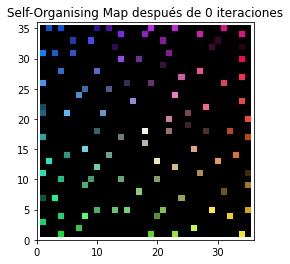

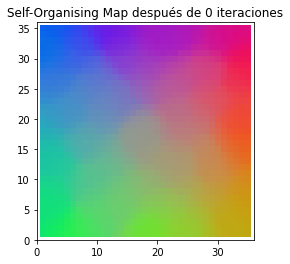

Mapa clasificacion:
 [[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.05098039 0.84705882 0.43137255]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.02352941 0.3254902  0.85490196]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.98431373 0.90588235 0.09019608]
  [0.         0.

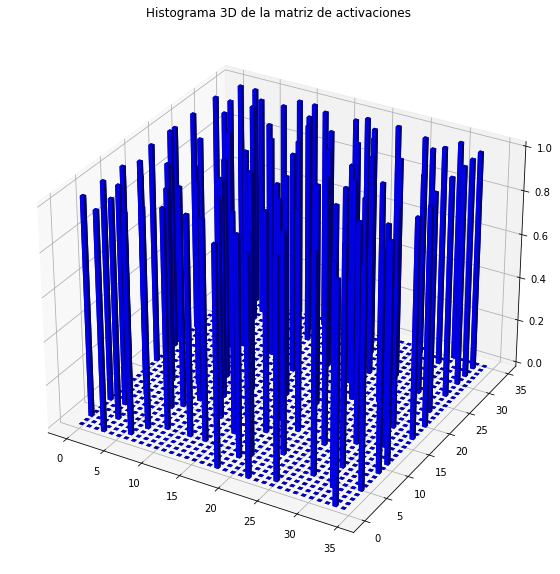

In [20]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada
clasificarDatos(datos)

## Graficas rendimiento

In [21]:

'''
   Crea una gráfica para los datos resultantes de lado mapa, learning rate y periodo
   Entradas: titulo, label eje x, eje x (lado mapa, learning rate y periodo), eje y1 error.cuantificacion, eje y2 error.topologógico, eje y3 num.clases
   Salidas:  gráfica rendimiento
'''

def plot_graph(title, xlabel, x, y1, y2, y3):
    #Crea una figura y un conjunto de ejes
    fig, ax = plt.subplots()
    #Etiquetas para los ejes
    ylabel1 = 'Valores error (morado topológico y verde cuantificación)'
    ylabel2 = 'Clases (rojo)'
    #Colores de las líneas de la gráfica
    color1 = 'tab:purple'
    color2 = 'tab:green'
    color3 = 'tab:red'
    #tipos de símbolos para cada línea de la grafica
    marker1 = '^'
    marker2 = 'o'
    marker3 = '*'
    #labels para las diferentes lineas de las gráficas
    label1 = 'E. Cuanti.'
    label2 = 'E. Topo.'
    label3 = 'Clases'
    #Añade cada línea a la gráfica
    ax.plot(x, y1, marker=marker1, color=color1, label=label1)
    ax.plot(x, y2, marker=marker2, color=color2, label=label2)
    #Establece la etiqueta del eje 'y' para el primer conjunto de datos
    ax.set_ylabel(ylabel1)
    
    #Crea un segundo conjunto de ejes y añade la tercera línea de datos
    ax2 = ax.twinx()
    ax2.plot(x, y3, marker=marker3, color=color3, label=label3)
    #Establece la etiqueta del eje 'y' para el segundo conjunto de datos
    ax2.set_ylabel(ylabel2)

    #Establece los valores que se muestran en el eje y
    plt.yticks(range(0, 120, 10))
    #Establece el título de la gráfica y estilo
    ax.set_title(title, loc="center", fontdict={'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    #Establece la etiqueta del eje x
    ax.set_xlabel(xlabel)

    #Muestra una línea de cuadrícula horizontal
    ax.grid(axis='y', color='gray', linestyle='dashed')
    
    #Muestra las leyendas de las líneas de datos
    ax.legend()
    ax2.legend()

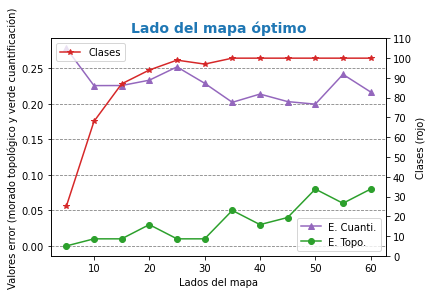

In [22]:
# Gráfica del cálculo del lado de mapa óptimo mediante los datos de las tabla recogida:
# Datos de muestra
lados_mapa = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
errs_cuant = [0.2780,0.2255,0.2256,0.2331,0.2518,0.2288,0.2020,0.2136,0.2030,0.1994,0.2413,0.2165]
errs_top = [0.0,0.01,0.01,0.03,0.01,0.01,0.05,0.03,0.04,0.08,0.06,0.08]
num_clases = [25,68,87,94,99,97,100,100,100,100,100,100]

title = 'Lado del mapa óptimo'
xlabel = 'Lados del mapa'

plot_graph(title, xlabel, lados_mapa, errs_cuant, errs_top, num_clases)
plt.show()

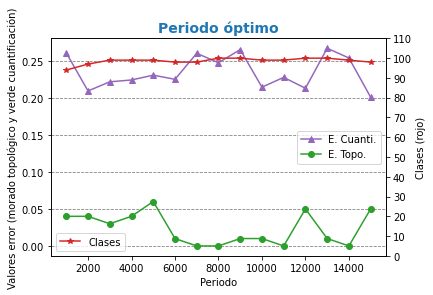

In [23]:
# Gráfica del cálculo del periodo óptimo mediante los datos de las tabla recogida:
# Datos de muestra
periodos = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
errs_cuant = [0.2606,0.2093,0.2216,0.2241,0.2306,0.2250,0.2601,0.2474,0.2651,0.2144,0.2276,0.2129,0.2669,0.2538,0.2008]
errs_top = [0.04,0.04,0.03,0.04,0.06,0.01,0.0,0.0,0.01,0.01,0.0,0.05,0.01,0.0,0.05]
num_clases = [94,97,99,99,99,98,98,100,100,99,99,100,100,99,98]

title = 'Periodo óptimo'
xlabel = 'Periodo'

plot_graph(title, xlabel, periodos, errs_cuant, errs_top, num_clases)
plt.show()

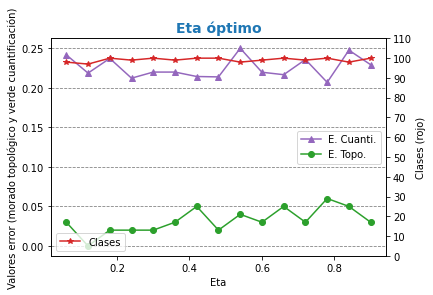

In [24]:
# Gráfica del cálculo del ñ- óptimo mediante los datos de las tabla recogida:
etas = [0.06, 0.12, 0.18, 0.24, 0.30, 0.36, 0.42, 0.48, 0.54, 0.60, 0.66, 0.72, 0.78, 0.84, 0.90]
errs_cuant = [0.2417,0.2186,0.2372,0.2122,0.2199,0.2199,0.2143,0.2138,0.2500,0.2197,0.2166,0.2358,0.2069,0.2476,0.2292]
errs_top = [0.03,0.0,0.02,0.02,0.02,0.03,0.05,0.02,0.04,0.03,0.05,0.03,0.06,0.05,0.03]
num_clases = [98,97,100,99,100,99,100,100,98,99,100,99,100,98,100]

title = 'Eta óptimo'
xlabel = 'Eta'


plot_graph(title, xlabel, etas, errs_cuant, errs_top, num_clases)
plt.show()

## SOM Prueba

Coordenadas de la BMU para el patron 1: [16, 18]

Coordenadas de la BMU para el patron 2: [34, 27]

Coordenadas de la BMU para el patron 3: [5, 0]

Coordenadas de la BMU para el patron 4: [5, 34]

Coordenadas de la BMU para el patron 5: [33, 0]

Coordenadas de la BMU para el patron 6: [25, 34]

Coordenadas de la BMU para el patron 7: [0, 15]

Coordenadas de la BMU para el patron 8: [16, 18]



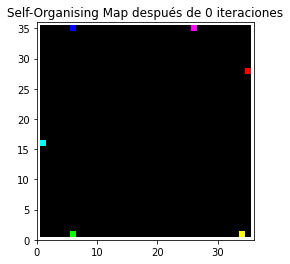

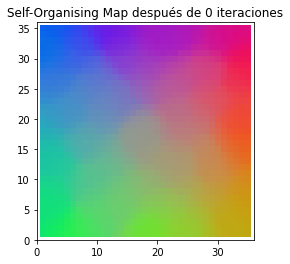

Mapa clasificacion:
 [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]] 


Mapa activaciones:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 


Mapa distancias:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.       

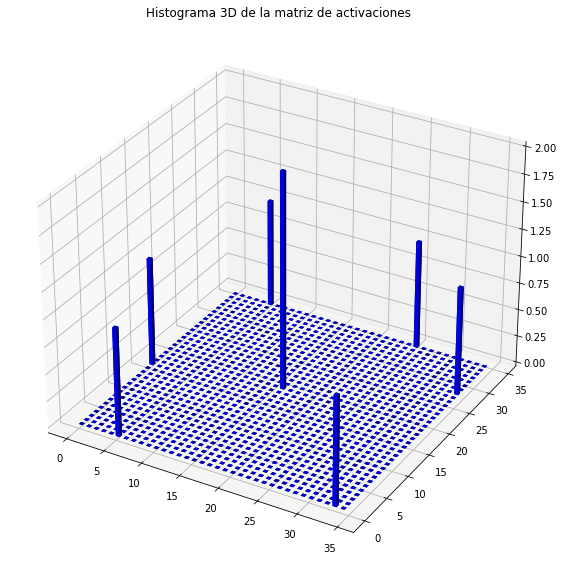

In [25]:
datos2 = np.array([[255, 255, 255],[255, 0, 0],[0, 255, 0],[0, 0, 255],
                   [255, 255, 0],[255, 0, 255],[0, 255, 255],[0.0001, 0.0001, 0.0001]]) 
VMax = np.max(datos2) 
datos2 = datos2/VMax  
clasificarDatos(datos2)
